## 1. Importing Necessary Libraries

In [184]:
## For analysis and numerical functions
import numpy as np
import pandas as pd

## For vizualisation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extra
import warnings
warnings.filterwarnings('ignore')

## 2. Dataset Loading

In [286]:
# Read the csv data
main_bikesharing_df= pd.read_csv("day.csv")

In [287]:
# Verify the data loading by inspecting dataset
main_bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [288]:
# Inspect the dataframe shape
main_bikesharing_df.shape

(730, 16)

In [289]:
# Check for null and datatypes
main_bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [290]:
main_bikesharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are 730 rows and 16 columns in the data set with no null values in any of the columns.

## 3. Data Cleaning

### 3.1. Drop columns that are not useful for analysis

In [291]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
main_bikesharing_df['days_old'] = (pd.to_datetime(main_bikesharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [292]:
main_bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [293]:
# Drop casual and registered columns as casual and registered variables are not available at the time of prediction 
## and also these describe the target variable as target = casual + registered.
main_bikesharing_df.drop(['casual'], axis = 1, inplace = True)
main_bikesharing_df.drop(['registered'], axis = 1, inplace = True)

# Drop dteday column as we have already have month and weekday columns for analysis
main_bikesharing_df.drop(['dteday'], axis = 1, inplace = True)

# Drop instant column as it is index column which has nothing to do with target
main_bikesharing_df.drop(['instant'], axis = 1, inplace = True)

In [294]:
## Check dataframe after dropping
main_bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


### 3.2. Handling outliers

In [295]:
main_bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [296]:
# Find number of unique values in all columns
main_bikesharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

In [297]:
num_cols= ['temp', 'atemp', 'hum', 'windspeed']
cat_cols= ['season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit']

## 4 EDA

###  4.1. Univariate Analysis

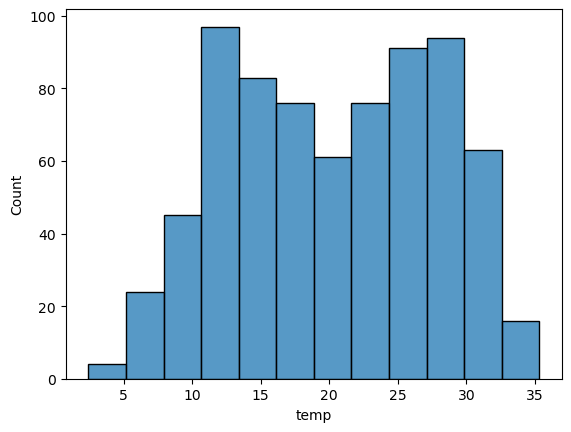

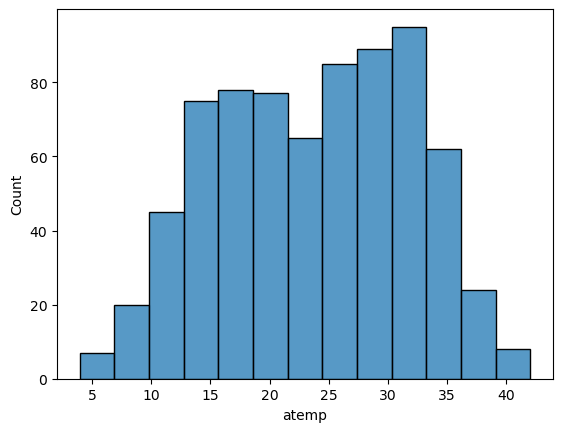

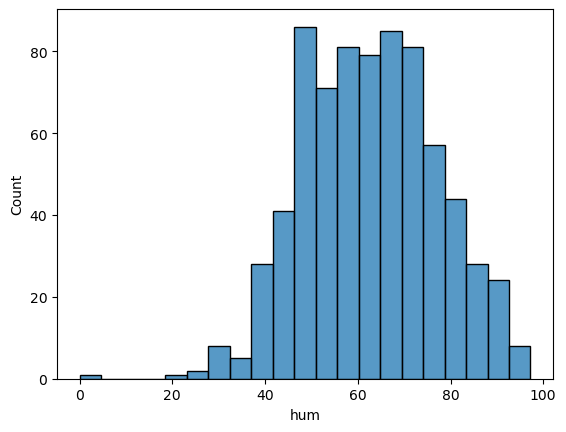

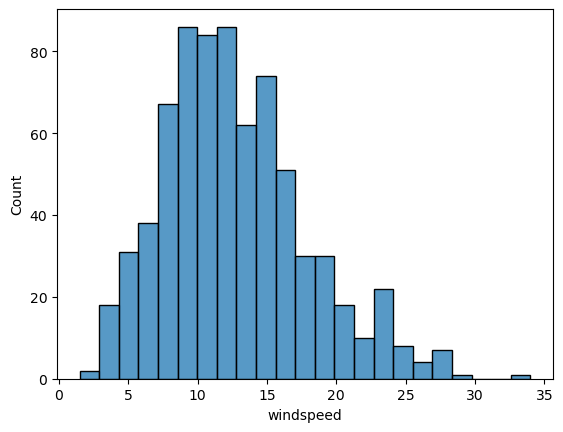

In [258]:
for i in num_cols:
    sns.histplot(x= main_bikesharing_df[i])
    plt.show()

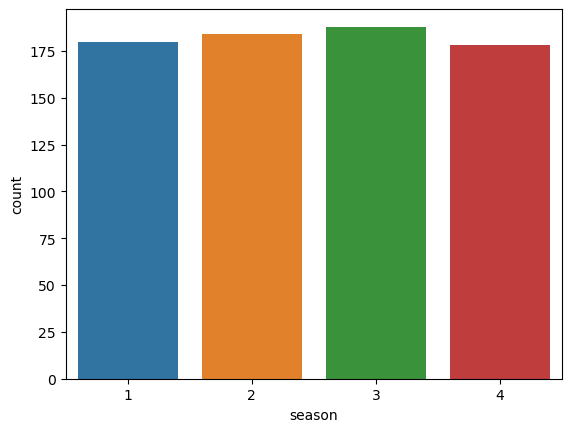

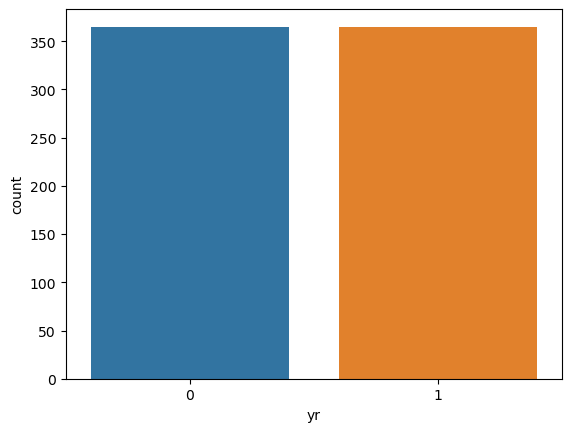

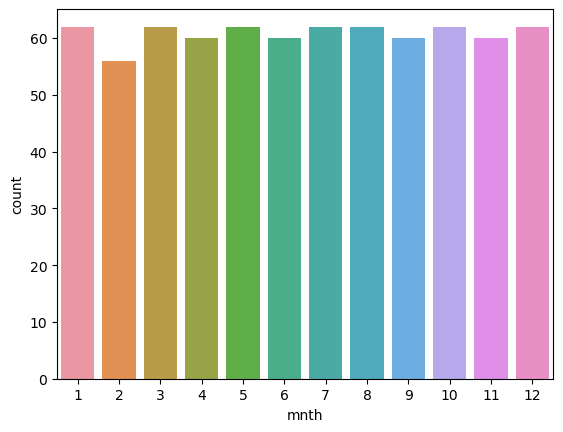

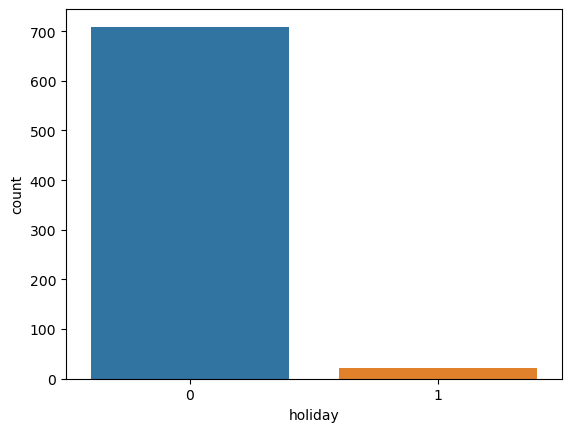

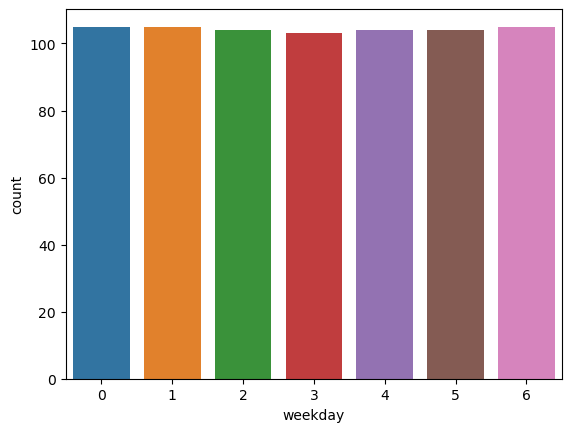

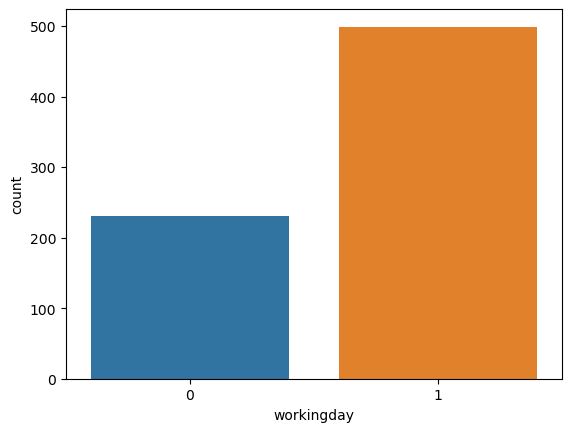

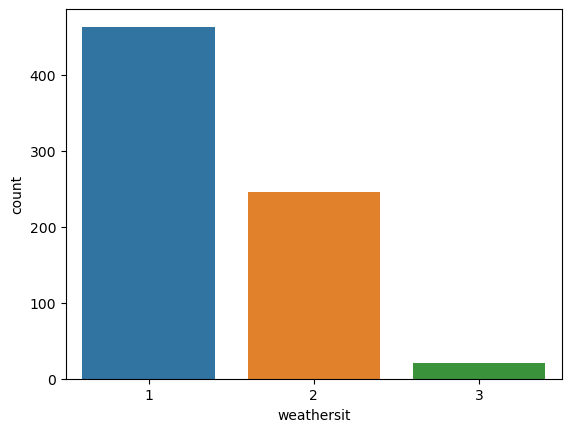

In [198]:
for i in cat_cols:
    sns.countplot(x= main_bikesharing_df[i])
    plt.show()

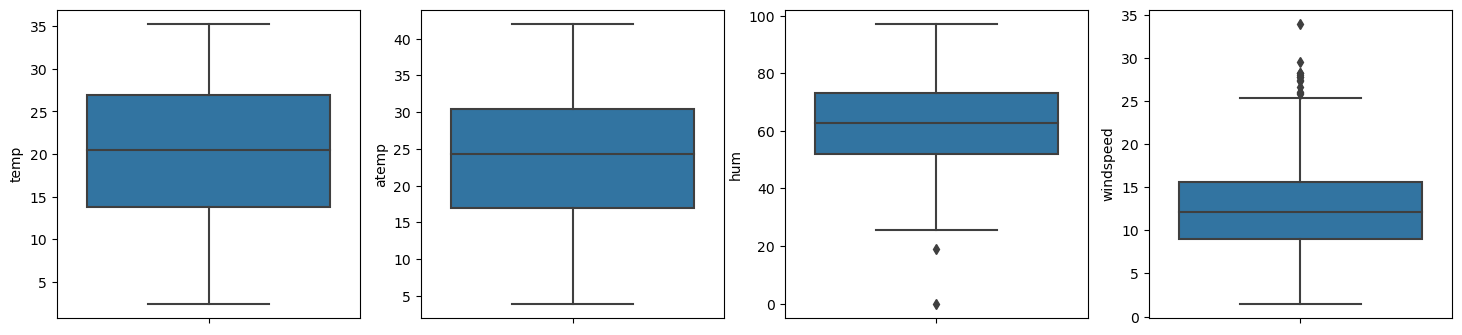

In [164]:
plt.figure(figsize=(18,4))

i = 1
for col in num_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=main_bikesharing_df)
    i+=1

#### _`Inference from the above plot`_: We can say that there are no outliers in the dataframe.

### 4.1.1.  Convert mnth, weekday, season and weathersit to categorical types

In [298]:
main_bikesharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

main_bikesharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

main_bikesharing_df.mnth = main_bikesharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

main_bikesharing_df.weekday = main_bikesharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
main_bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


### 4.2. Bivariate Analysis

### 4.2.1. Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

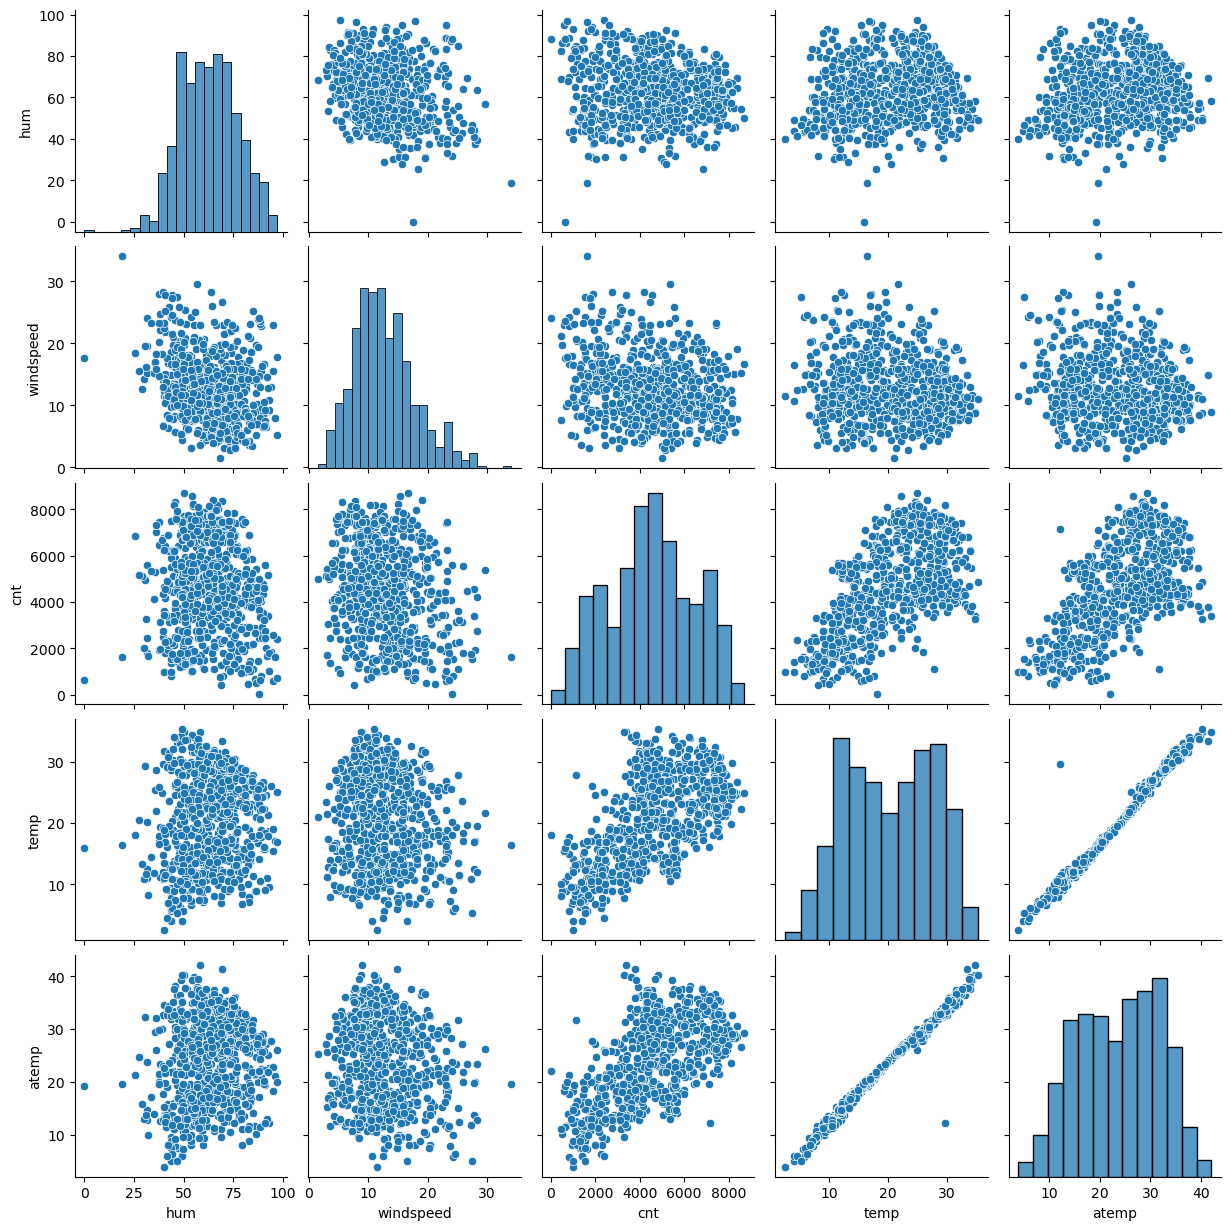

In [299]:
# Plot pairplots for numerical variables
plt.figure(figsize = (15,30))
sns.pairplot(data=main_bikesharing_df,vars=['hum','windspeed', 'cnt', 'temp', 'atemp'])
plt.show()

#### _`Inference from the above pairplot`_: variable 'temp' and 'atemp' is highly correlated with each other.
#### Also, both temp and atemp are highly correlated with target variable 'cnt' . Hence both variable has linear relationship with target variable.

### 4.2.2 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 2000x1500 with 0 Axes>

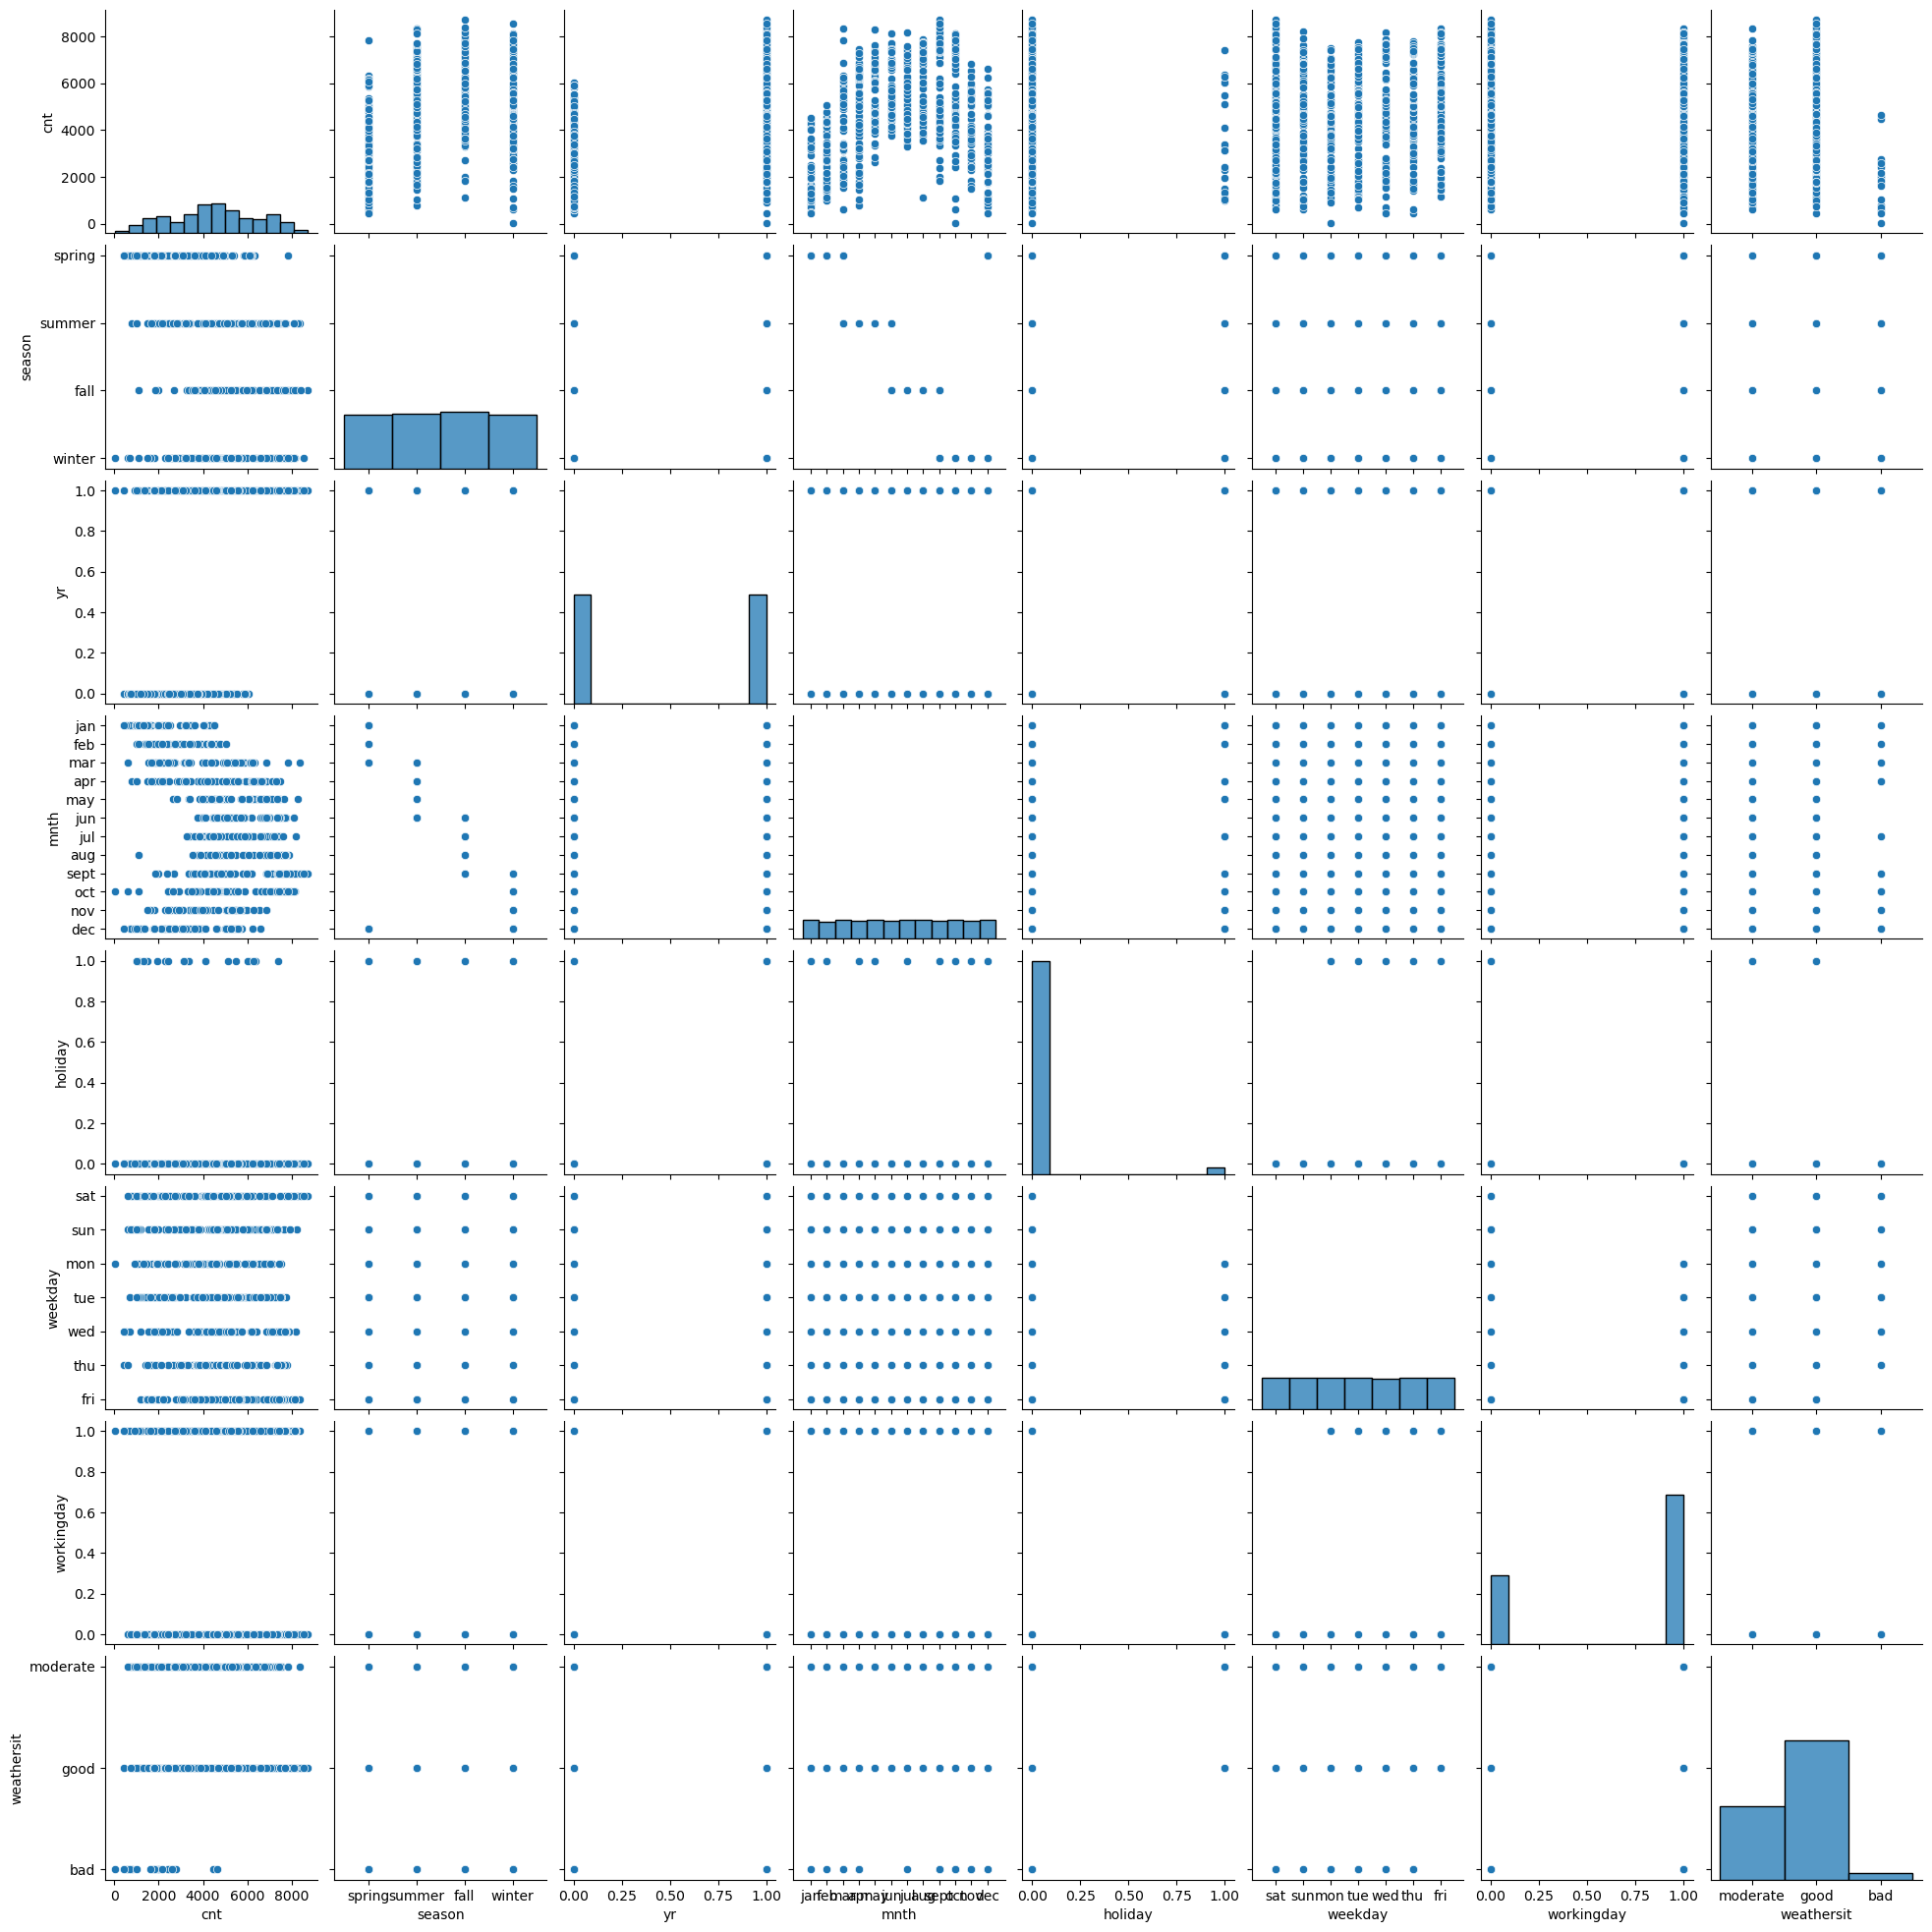

In [300]:
plt.figure(figsize=(20,15))
sns.pairplot(data=main_bikesharing_df,vars=['cnt', 'season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit'])
plt.show()


### 4.2.3. Create Heatmap of correlation between dataframe variables

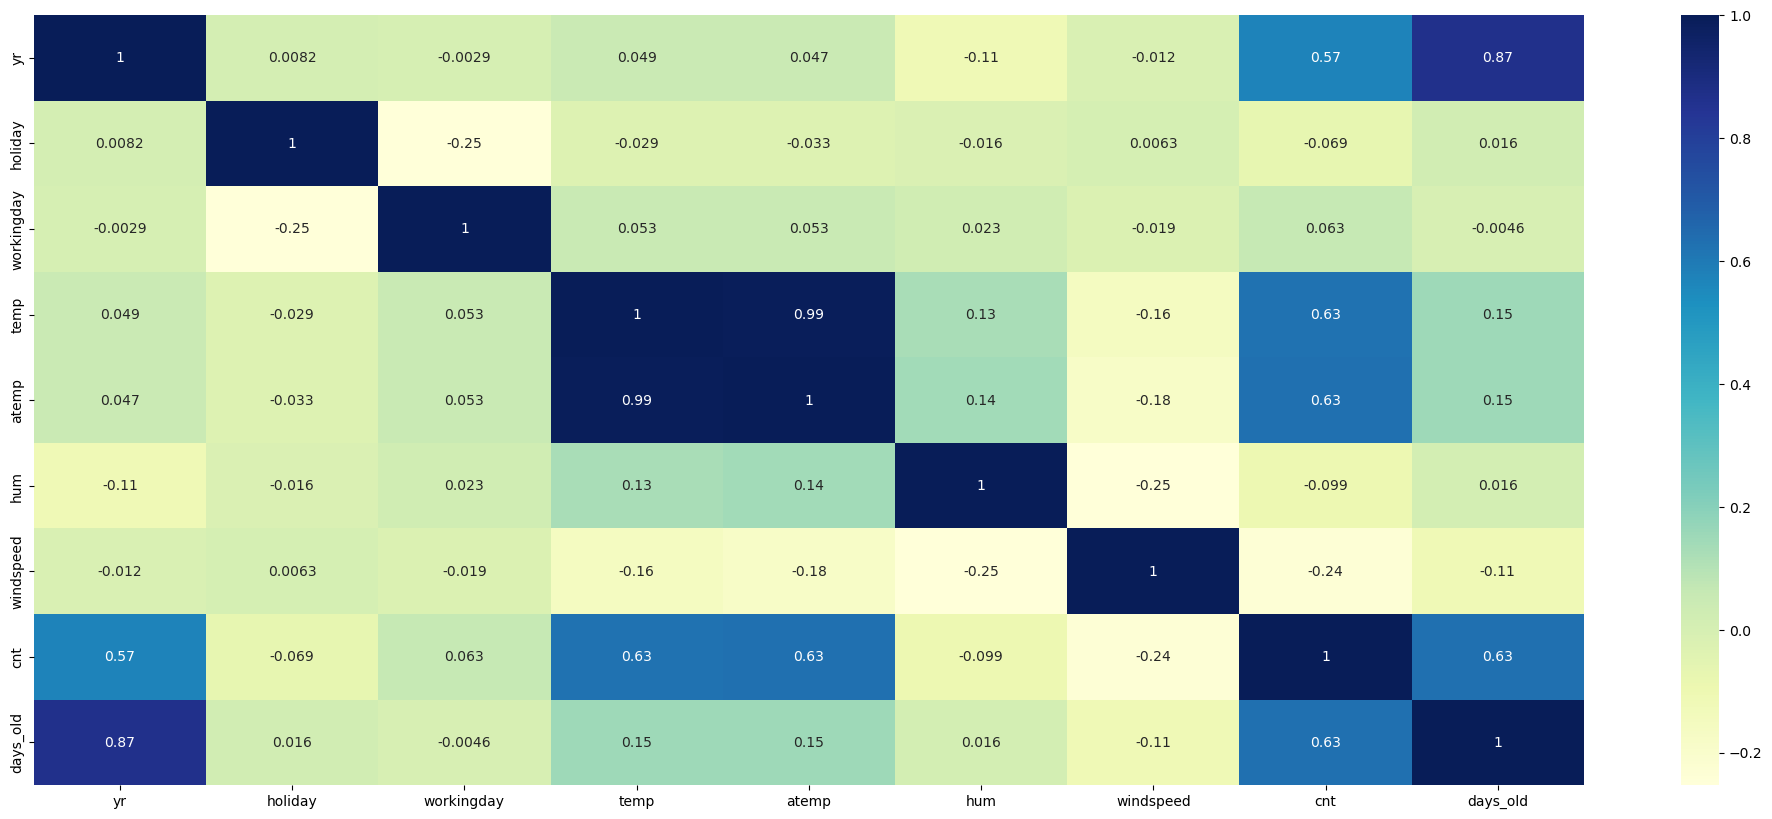

In [301]:
# Find Correlation
corr = main_bikesharing_df.corr()
plt.figure(figsize=(25,10))

# Generate Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### _`Inference from the above plotting`_: From the correlation map, temp, atemp and days_old seems to be highly correlated and one of them is good candidate for the model.
#### We can also infer Target variable (cnt) has a linear relationship with some of the indeptendent variables which is good sign for building a linear regression Model.

### 4.2.4. Analyse Categorical variables with Target variables

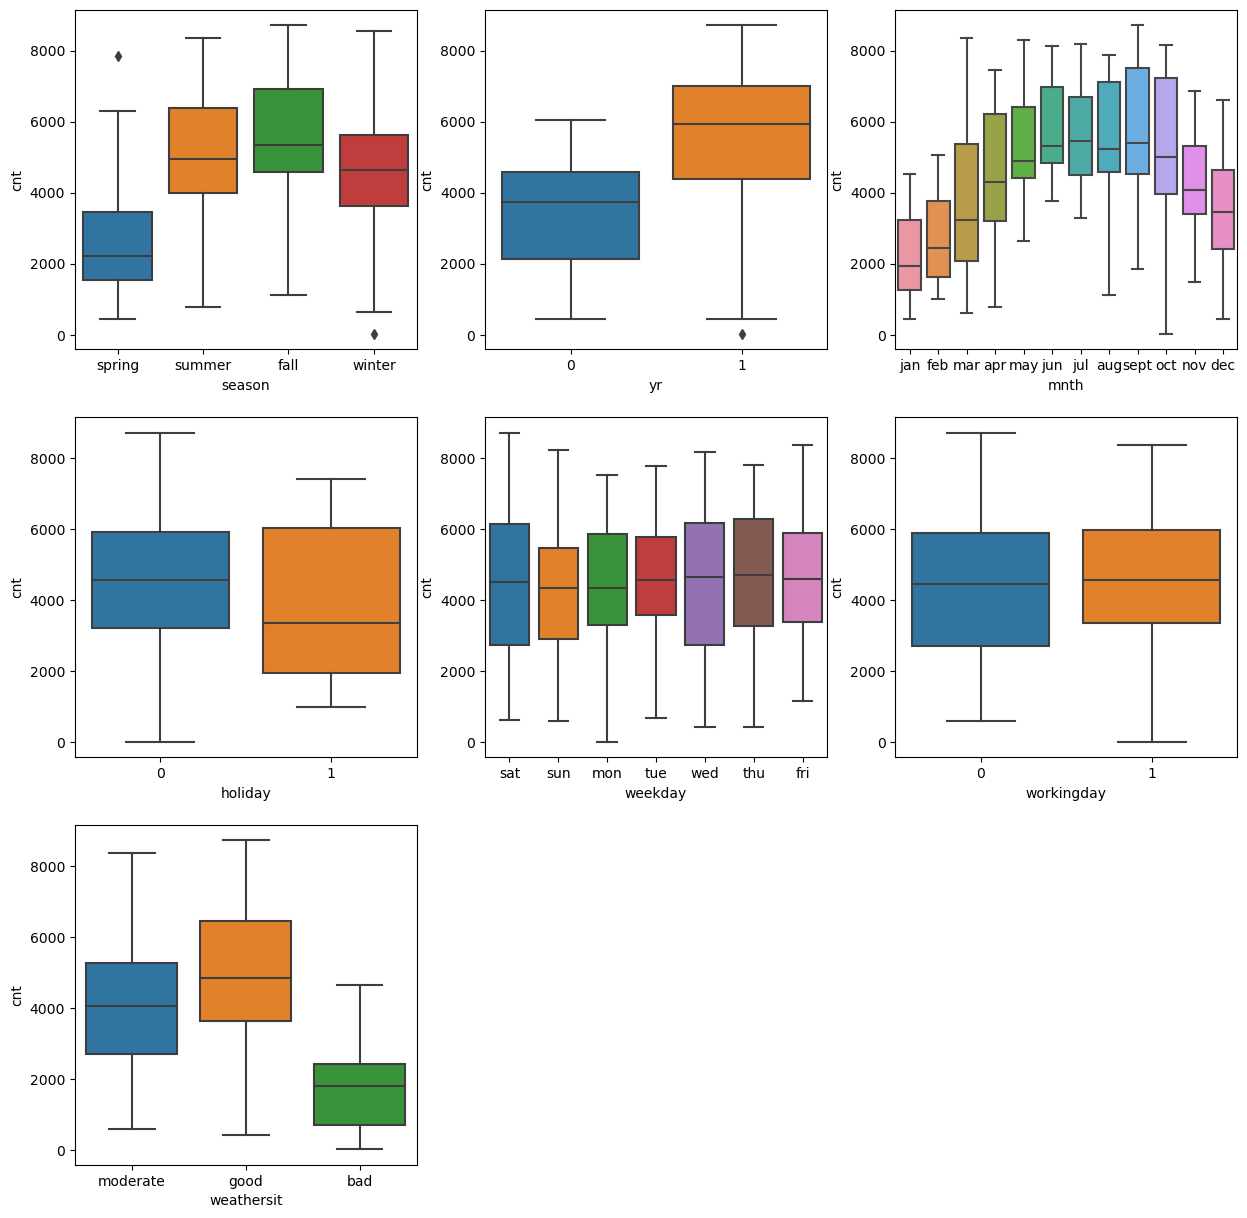

In [302]:
plt.figure(figsize=(15, 15))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=main_bikesharing_df, x=i[1], y='cnt')
plt.show()

### 4.2.5. Draw scatterplot for categorical variables against target variable (cnt)

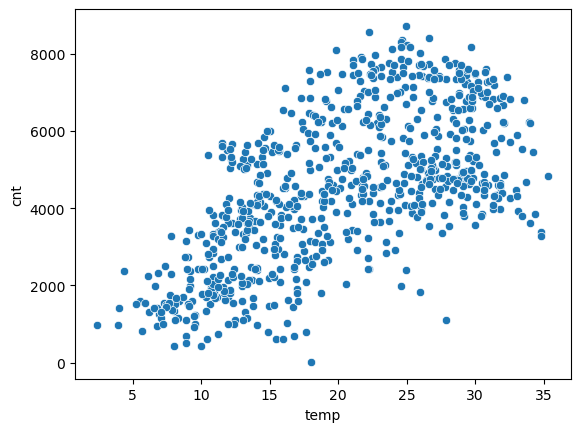

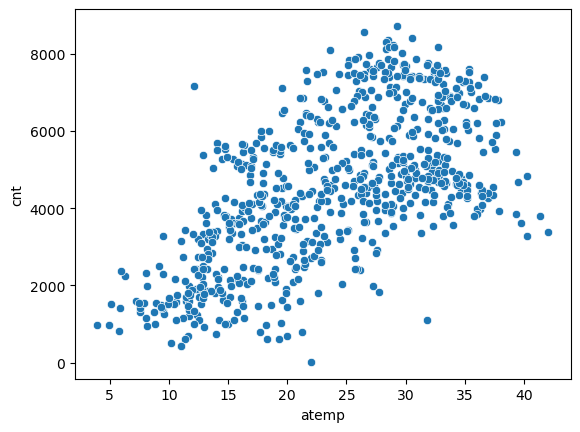

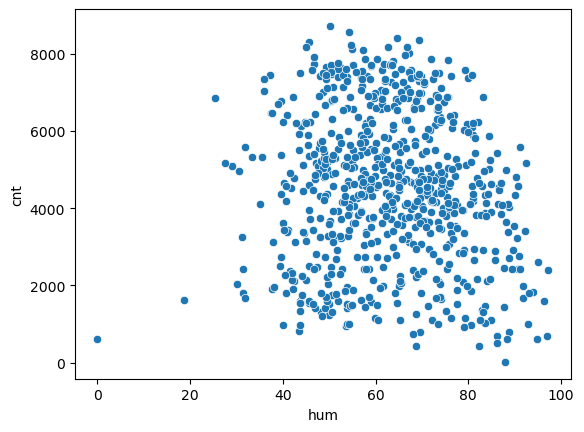

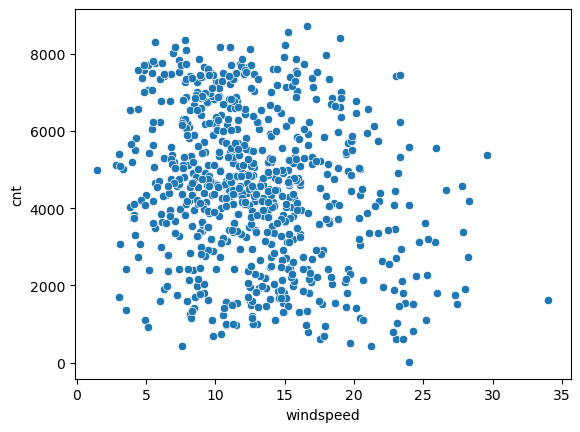

In [205]:
for i in num_cols:
    sns.scatterplot(x= main_bikesharing_df[i], y=main_bikesharing_df['cnt'])
    plt.show()

#### _`Inference`_:
    Couple of insights from the above plots are listed below:

    1. Season: 3:fall has highest demand for rental bikes.
    2. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing.
    3.During the month of September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.
    4. Demand for next year has grown.
    5. Whenever there is a holiday, demand has decreased.
    6. Weekday is not giving clear picture about demand.
    7. The clear weathershit has highest demand.
    8. Demand for bikes is positively correlated to temp.We can see that cnt is linearly increasing with temp indicating linear relation.
    9. Hum is values are more scattered around. Although we can see cnt decreasing with increase in humidity.
    10. Windspeed is values are more scattered around. Although we can see cnt decreasing with increase in windspeed.

## 5. Data Preparation for Linear Regression

### 5.1 Create dummy variables for non-binary categorical variables (One Hot Encoding)

In [303]:
### Only for non-binary categorical columns
main_bikesharing_df = pd.get_dummies(data=main_bikesharing_df,columns=["season","mnth","weekday"],drop_first=True)
main_bikesharing_df = pd.get_dummies(data=main_bikesharing_df,columns=["weathersit"])

In [304]:
main_bikesharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [305]:
main_bikesharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


In [306]:
main_bikesharing_df.shape

(730, 32)

## 6. Model Building

### 6.1. Split Data into training and test

In [307]:
# X will contain all remaining variable except target variable which are also called independent variables
X = main_bikesharing_df.drop(['cnt'], axis=1)
# y will be our target variable
y = main_bikesharing_df['cnt']

In [308]:
# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [309]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [310]:
# Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


### 6.2. Feature Scaling for continous variables

In [267]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [311]:
# Scale continuous variables
numeric_vars = ['windspeed','days_old','hum','temp','atemp']

# Use Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])

In [181]:
##X_train = (X_train-X_train.mean())/X_train.std()
##X_test = (X_test-X_test.mean())/X_test.std()

In [312]:
# Inspect stats from Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.505822,0.242661,0.246575,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.288146,0.429112,0.431440,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.256181,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.512363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.758929,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [313]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,1,0,0,0,0,0,0,1


### 6.3. Feature Selection

#### 6.3.1. Use RFE to eliminate few columns

In [314]:
## Build a Linear Regression Model using RFE 
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=15)

selector= selector.fit(X_train, y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True,  True])

In [315]:
# To display columns selected by RFE
X_train.columns[selector.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [316]:
# To show the ranking of the features selected by RFE.
selector.ranking_

array([ 1,  1,  2,  1,  8,  1,  1,  1,  1,  3,  1,  6, 16,  5,  1,  1,  9,
       15,  7, 17,  4,  1, 11,  1, 10, 13, 12, 14,  1,  1,  1])

In [317]:
#Columns selected by RFE and their weights
list(zip(X_train.columns[selector.support_],selector.support_,selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', False, 2),
 ('hum', True, 1),
 ('windspeed', False, 8),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_winter', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 3),
 ('mnth_sept', True, 1),
 ('weekday_sat', False, 6),
 ('weathersit_bad', False, 16),
 ('weathersit_good', False, 5),
 ('weathersit_moderate', True, 1)]

In [318]:
# Features not selected by RFE
X_train.columns[~selector.support_]

Index(['workingday', 'atemp', 'season_summer', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [319]:
selected_features = X_train.columns[selector.support_]

In [320]:
X_train =  X_train[selected_features]
X_test = X_test[selected_features]

## 6.4. Feature Elimination

### 6.4.1 Function to build a model using statsmodel API

In [321]:
#Function to build a model using statsmodel api and print them - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

### 6.4.2 Function to calculate Variance Inflation Factors(VIFs) and print them

In [322]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [323]:
X_train.shape
X_test.shape

(219, 15)

## 7. Build Model

### 7.1. Model1 - Considering all the features selected by RFE

In [327]:
build_model(selected_features)
get_vif(selected_features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.30e-189
Time:                        14:14:22   Log-Likelihood:                -4124.1
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1731.5100    

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [325]:
# Dropping 'weekday_sat' column as it has p value greater than 0.05
selected_features_x_train_m2 =  X_train[selected_features].drop(['weekday_sat'], axis=1)
selected_features_x_train_m2
selected_features_x_test_m2 =  X_test[selected_features].drop(['weekday_sat'], axis=1)
selected_features_x_test_m2

,yr,holiday,temp,hum,windspeed,days_old,season_spring,season_winter,mnth_jan,mnth_jul,mnth_sept,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,29.793347,63.7917,5.459106,184,0,0,0,1,0,0,0,1
535,1,0,32.082500,59.2083,7.625404,535,0,0,0,0,0,0,1,0
299,0,0,19.270000,81.2917,13.250121,299,0,1,0,0,0,0,0,1
221,0,0,31.433347,42.4167,13.417286,221,0,0,0,0,0,0,1,0
152,0,0,29.315000,30.5000,19.583229,152,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,10.899153,68.7917,11.791732,400,1,0,0,0,0,0,0,1
702,1,0,19.509153,73.3750,11.666643,702,0,1,0,0,0,0,1,0
127,0,0,21.661653,63.1667,5.000712,127,0,0,0,0,0,0,1,0
640,1,0,26.957500,79.3750,4.458569,640,0,1,0,0,0,0,0,1


### 7.2. Model2 - After dropping 'weekday_sat' column

In [328]:
build_model(selected_features_x_train_m2.columns)
get_vif(selected_features_x_train_m2.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.23e-189
Time:                        14:15:05   Log-Likelihood:                -4125.5
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     497   BIC:                             8338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1761.4820    

In [329]:
# Dropping 'weathersit_good' column as it has highest VIF value and greater than 5
selected_features_x_train_m3 =  X_train[selected_features_x_train_m2.columns].drop(['weathersit_good'], axis=1)
selected_features_x_train_m3
selected_features_x_test_m3 =  X_test[selected_features_x_train_m2.columns].drop(['weathersit_good'], axis=1)
selected_features_x_test_m3

,yr,holiday,temp,hum,windspeed,days_old,season_spring,season_winter,mnth_jan,mnth_jul,mnth_sept,weathersit_bad,weathersit_moderate
184,0,1,29.793347,63.7917,5.459106,184,0,0,0,1,0,0,1
535,1,0,32.082500,59.2083,7.625404,535,0,0,0,0,0,0,0
299,0,0,19.270000,81.2917,13.250121,299,0,1,0,0,0,0,1
221,0,0,31.433347,42.4167,13.417286,221,0,0,0,0,0,0,0
152,0,0,29.315000,30.5000,19.583229,152,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,10.899153,68.7917,11.791732,400,1,0,0,0,0,0,1
702,1,0,19.509153,73.3750,11.666643,702,0,1,0,0,0,0,0
127,0,0,21.661653,63.1667,5.000712,127,0,0,0,0,0,0,0
640,1,0,26.957500,79.3750,4.458569,640,0,1,0,0,0,0,1


### 7.3. Model3 - After dropping 'weathersit_good' column

In [330]:
build_model(selected_features_x_train_m3.columns)
get_vif(selected_features_x_train_m3.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.23e-189
Time:                        14:20:57   Log-Likelihood:                -4125.5
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     497   BIC:                             8338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3226.7500    

In [332]:
# Dropping 'days_old' column as it has highest VIF value and greater than 5
selected_features_x_train_m4 =  X_train[selected_features_x_train_m3.columns].drop(['days_old'], axis=1)
selected_features_x_test_m4 =  X_test[selected_features_x_train_m3.columns].drop(['days_old'], axis=1)

### 7.4. Model4 - After dropping 'days_old' column

In [333]:
build_model(selected_features_x_train_m4.columns)
get_vif(selected_features_x_train_m4.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          4.75e-189
Time:                        14:38:01   Log-Likelihood:                -4129.1
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3058.6214    

In [334]:
# Dropping 'hum' column as it has highest VIF value and greater than 5
selected_features_x_train_m5 =  X_train[selected_features_x_train_m4.columns].drop(['hum'], axis=1)
selected_features_x_test_m5 =  X_test[selected_features_x_train_m4.columns].drop(['hum'], axis=1)

### 7.5. Model5 - After dropping 'hum' column

In [335]:
build_model(selected_features_x_train_m5.columns)
get_vif(selected_features_x_train_m5.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.22e-186
Time:                        14:42:39   Log-Likelihood:                -4137.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     499   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2338.0560    

#### `_Inference`_
Here, VIFs for all the featurs are <5 which is acceptable. p-value for all the features is almost 0.0 and R2 is 0.834 .
Let us select Model 5 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [337]:
## Build the final model using model 5 columns
lr1 = LinearRegression()

lr= lr1.fit(X_train[selected_features_x_train_m5.columns], y_train)
print(lr.intercept_,lr.coef_)

2338.0559835928643 [ 2047.28164095  -849.09482034  3758.37978884 -1285.37621758
  -890.97927935   366.61128021  -373.31317648  -606.05462315
   504.13071632 -2498.5595649   -688.1070538 ]


## 8. Model Evaluation

### 8.1 Residual Analysis

In [340]:
y_train_pred = lr.predict(X_train[selected_features_x_train_m5.columns])

In [341]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

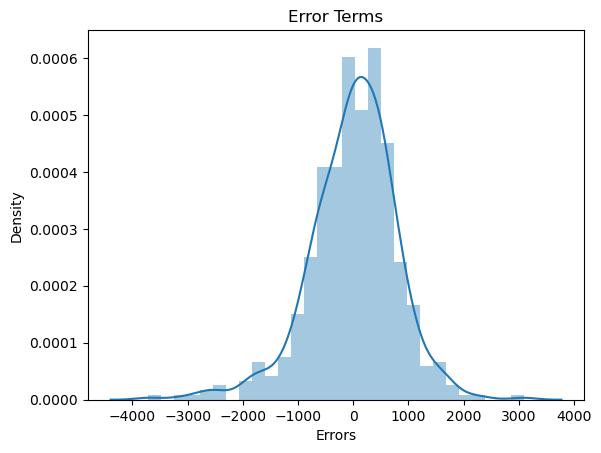

In [342]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

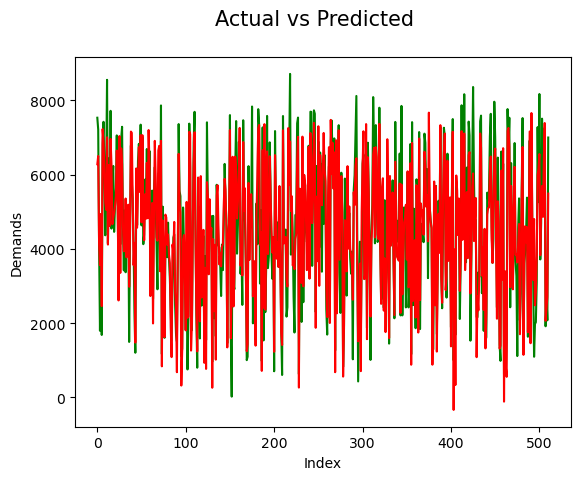

In [345]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so the selected model seems ok.

### 7.2. R-Squared value for train predictions

In [346]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8341001542838904

### _`Inference`_
R2 Same as we obtained for our final model

### 7.3. Predict values for test data set

In [361]:
y_pred = lr.predict(X_test[selected_features_x_test_m5.columns])

### 7.4 R-Squared value for test predictions

In [362]:
r2_score(y_test,y_pred)

-1249.2704160320607

In [354]:
selected_features_x_test_m5.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_jan', 'mnth_jul', 'mnth_sept', 'weathersit_bad',
       'weathersit_moderate'],
      dtype='object')

## 8. Making predictions from the model

### 8.1. Interpretting the Model

In [357]:
 ### #Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_jan', 'mnth_jul', 'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.22e-186
Time:                        16:22:04   Log-Likelihood:                -4137.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     499   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2338.0560    

### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Winter.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during winter when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

## Linear Regression Model (Line of Best Fit)

In [ ]:
cnt =  2047.2816*yr-849.0948*holiday+3758.3798*temp-1285.3762*windspeed-890.9793*season_spring+366.6113*season_winter-373.3132*mnth_jan
-606.0546*mnth_jul+504.1307*mnth_sept-2498.5596*weathersit_bad-688.1071*weathersit_moderate+ 2338.0560

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(September, October, November, December)
- Year (2019)
- weathersit( Light Snow, Mist + Cloudy)